№8.1.2
(4*y=x^2, 2*y=6-x^2)

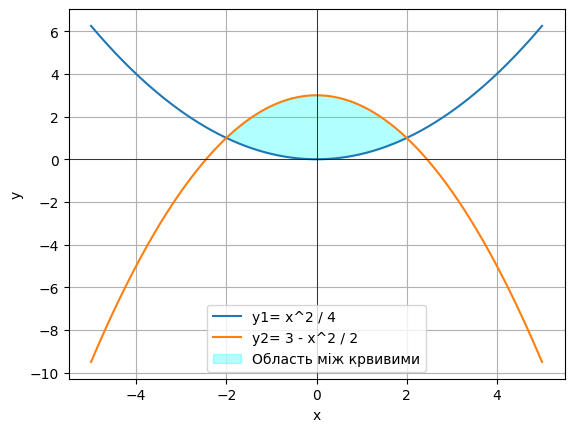

Площа: 8.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad


def y1(x):
    return x**2 / 4

def y2(x):
    return 3 - x**2 / 2



x = np.linspace(-5, 5, 400)
plt.plot(x, y1(x), label='y1= x^2 / 4')
plt.plot(x, y2(x), label='y2= 3 - x^2 / 2')

plt.fill_between(x, y1(x), y2(x), where=(y1(x) < y2(x)), color='cyan', alpha=0.3, label='Область між крвивими')

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.legend()

plt.show()

# знаходження таких значень x, при яких різниця між y1(x) та y2(x) дорівнює нулю, тобто, де обидві функції перетинаються.
intersection_points_x = fsolve(lambda x: y1(x) - y2(x), [-2, 2])

area, _ = quad(lambda x: np.abs(y1(x) - y2(x)), intersection_points_x[0], intersection_points_x[1]) 

print("Площа:", area)

8.2.2 ro=2+cos(phi)

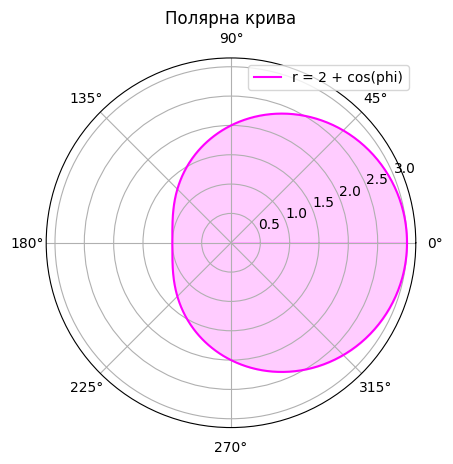

Площа: 12.566370614359172


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def integrand(phi):
    return (2 + np.cos(phi))

alpha = 0
beta = 2 * np.pi

# Побудуйте графік
phi = np.linspace(alpha, beta, 500)
ro = 2 + np.cos(phi)
plt.polar(phi, ro, label='r = 2 + cos(phi)', color='magenta')
plt.fill_between(phi, 0, ro, alpha=0.2, color='magenta')
plt.title('Полярна крива')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

result, _ = integrate.quad(integrand, alpha, beta)
print(f'Площа: {result}')

8.3.3 x=16*cos^3(t), y= 2 * sin^3(t), x=2 (x>=2)

альфа:  pi/3
вираз під інтеграл:  -96*sin(t)**4*cos(t)**2
Площа: 6.283185307179587


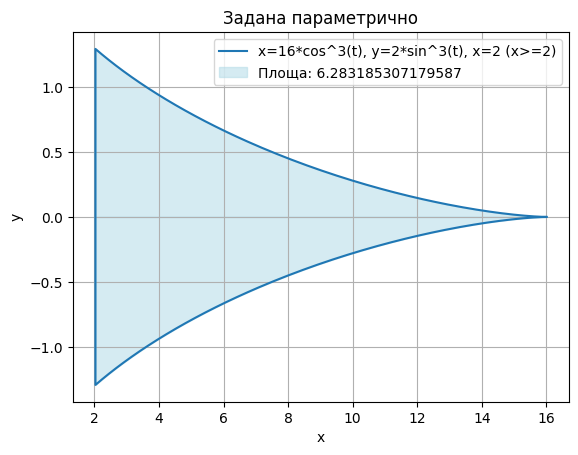

In [152]:
import numpy as np
from scipy.integrate import quad
import sympy as sp
import matplotlib.pyplot as plt

t_symbolic = sp.symbols('t')

x = 16 * sp.cos(t_symbolic)**3
y = 2 * sp.sin(t_symbolic)**3
x_lower = 2
equation = sp.Eq(x, x_lower)

alfa = sp.solve(equation, t_symbolic)[0]  # x = 2
betha = 0 #0, оскільки cos найбільше значення в 0
print('альфа: ',alfa)

expr = y * sp.diff(x)
print('вираз під інтеграл: ',expr)
integrand = sp.lambdify(t_symbolic, expr, 'numpy')
area, _ = quad(integrand, alfa, betha)
print("Площа:", area)

t_values = np.linspace(0, 2 * np.pi, 1000)
x_values = sp.lambdify(t_symbolic, x, 'numpy')(t_values)
y_values = sp.lambdify(t_symbolic, y, 'numpy')(t_values)

#  x = 2 (x >= 2)
x_2 = x_values[x_values >= 2]
y_2 = y_values[x_values >= 2]


plt.plot(x_2, y_2, label='x=16*cos^3(t), y=2*sin^3(t), x=2 (x>=2)')
plt.fill_between(x_2, y_2, color='lightblue', alpha=0.5, label=F'Площа: {area}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Задана параметрично')
plt.legend()

plt.grid(True)
plt.show()


Перевірка (для тих хто шарить)

In [153]:
import numpy as np
from scipy.integrate import quad
import sympy as sp

func = lambda t: -96 * (np.sin(t))**4 * (np.cos(t))**2
area,_ = quad(func, np.pi / 3, 0)
print(area)

6.2831853071795845


8.4.2

y= ln(2/x), x є [sqrt(3); sqrt(8)]

Довжина: 1.2027325540540827


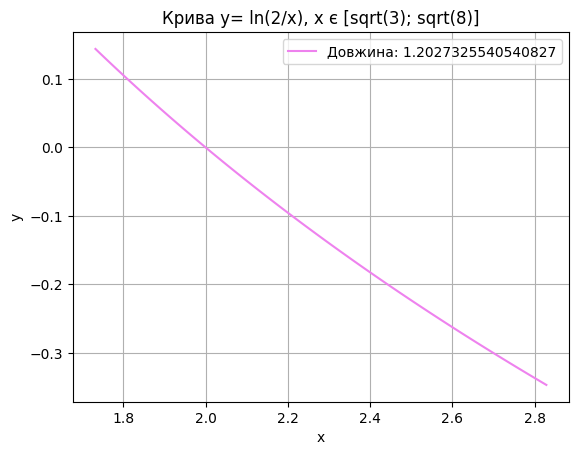

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as sp


x_symbolic = sp.symbols('x')
y_symbolic = sp.log(2/x_symbolic)
dy_dx_symbolic = sp.diff(y_symbolic, x_symbolic)


y = sp.lambdify(x_symbolic, y_symbolic, 'numpy')
dy_dx = sp.lambdify(x_symbolic, dy_dx_symbolic, 'numpy')

def integrand(x):
    return np.sqrt(1 + dy_dx(x)**2)

a = np.sqrt(3)
b = np.sqrt(8)

length, _ = quad(integrand, a, b)

print(f"Довжина: {length}")

x_values = np.linspace(a, b, 100)
y_values = y(x_values)

plt.plot(x_values, y_values, label=F'Довжина: {length}', color= 'violet')
plt.title('Крива y= ln(2/x), x є [sqrt(3); sqrt(8)]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


8.5.2

x=2*(cos(t)+t*sin(t)), y=2*(sin(t)-t*cos(t)), 0 <= t <= pi/2

Довжина: 2.4674011002723395


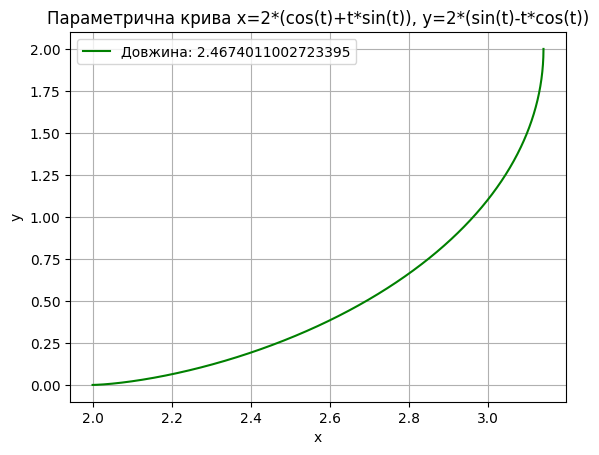

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as sp

t_symbol = sp.symbols('t')

x_symbol = 2 * (sp.cos(t_symbol) + t_symbol * sp.sin(t_symbol))
y_symbol = 2 * (sp.sin(t_symbol) - t_symbol * sp.cos(t_symbol))

dx_dt_symbol = sp.diff(x_symbol, t_symbol)
dy_dt_symbol = sp.diff(y_symbol, t_symbol)

x = sp.lambdify(t_symbol, x_symbol, 'numpy')
y = sp.lambdify(t_symbol, y_symbol, 'numpy')
dx_dt = sp.lambdify(t_symbol, dx_dt_symbol, 'numpy')
dy_dt = sp.lambdify(t_symbol, dy_dt_symbol, 'numpy')

def integrand(t):
    return np.sqrt(dx_dt(t)**2 + dy_dt(t)**2)


length, _ = quad(integrand, 0, np.pi/2) #межі вказані в умові

print(f"Довжина: {length}")

# Plot the curve
t_values = np.linspace(0, np.pi/2, 1000)
x_values = x(t_values)
y_values = y(t_values)

plt.plot(x_values, y_values, label=F'Довжина: {length}', color= 'green')
plt.title('Параметрична крива x=2*(cos(t)+t*sin(t)), y=2*(sin(t)-t*cos(t))')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
